In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

## Read in dataset

In [ ]:
# df = pd.read_csv("sf_crime_truncated.csv", index_col="Dates", parse_dates=["Dates", "DayOfWeek"])
df = pd.read_csv("sf_crime_truncated.csv", parse_dates=["Dates", "DayOfWeek"])
df.head()

enc = preprocessing.OneHotEncoder()

In [ ]:
df.describe()

,X,Y
count,20000.000000,20000.000000
mean,-122.422499,37.772153
std,0.031782,0.522885
min,-122.513642,37.708154
25%,-122.433220,37.752239
50%,-122.416349,37.775421
75%,-122.406841,37.784401
max,-120.500000,90.000000


## Sanity Check

In [ ]:
df = df[df["Y"] <= 38]
df[df["Y"] > 38] ## double check

df['Dates'] = pd.to_datetime(df['Dates'])

## Add anothe column for checking if is holiday

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2003-01-01', end='2014-12-31')

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

df.sort_values('Dates', ascending=False)
  
# df['Holiday'] = df['Dates'].isin(holidays)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
5208,2015-05-13 20:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,CALIFORNIA ST / BUCHANAN ST,-122.430552,37.789323
4451,2015-05-13 19:28:00,VEHICLE THEFT,STOLEN AND RECOVERED VEHICLE,Wednesday,CENTRAL,NONE,0 Block of SANSOME ST,-122.400720,37.790712
16057,2015-05-13 16:30:00,VEHICLE THEFT,STOLEN TRUCK,Wednesday,NORTHERN,NONE,SUTTER ST / WEBSTER ST,-122.431553,37.786304
13411,2015-05-13 16:00:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Wednesday,BAYVIEW,NONE,100 Block of KISKA RD,-122.375989,37.730158
15883,2015-05-13 15:22:00,NON-CRIMINAL,TRAFFIC ACCIDENT,Wednesday,BAYVIEW,NONE,1200 Block of CONNECTICUT ST,-122.396270,37.750453
...,...,...,...,...,...,...,...,...,...
17752,2003-01-06 16:30:00,NON-CRIMINAL,LOST PROPERTY,Monday,MISSION,NONE,1000 Block of POTRERO AV,-122.406539,37.756486
3406,2003-01-06 13:00:00,NON-CRIMINAL,LOST PROPERTY,Monday,RICHMOND,NONE,3200 Block of GEARY BL,-122.453658,37.781533
17521,2003-01-06 11:20:00,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Monday,TENDERLOIN,"ARREST, CITED",0 Block of UNITED NATIONS PZ,-122.414318,37.779944
11776,2003-01-06 07:21:00,OTHER OFFENSES,VIOLATION OF PARK CODE,Monday,SOUTHERN,"ARREST, CITED",0 Block of UNITED NATIONS PZ,-122.414318,37.779944


In [ ]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Holiday
0,2009-06-11 13:45:00,OTHER OFFENSES,CONSPIRACY,Thursday,TARAVAL,JUVENILE BOOKED,19TH AV / OCEAN AV,-122.474954,37.732456,False
1,2005-10-17 12:00:00,ASSAULT,THREATENING PHONE CALL(S),Monday,TARAVAL,NONE,1500 Block of SLOAT BL,-122.489714,37.733950,False
2,2012-09-20 20:30:00,NON-CRIMINAL,LOST PROPERTY,Thursday,MISSION,NONE,1800 Block of FOLSOM ST,-122.415605,37.767718,False
3,2006-03-25 15:28:00,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,RICHMOND,"ARREST, BOOKED",800 Block of 28TH AV,-122.487534,37.773336,False
4,2013-10-01 00:33:00,WARRANTS,ENROUTE TO PAROLE OFFICER,Tuesday,MISSION,"ARREST, BOOKED",1200 Block of CHURCH ST,-122.427465,37.751296,False


## Build the correlation map

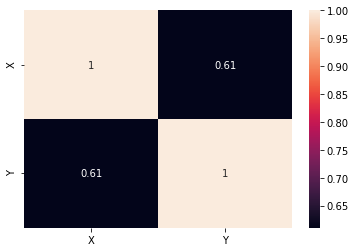

In [ ]:
# df["DayOfWeek"] = df["DayOfWeek"].astype("category").cat.codes
# df["Descript"] = df["Descript"].astype("category").cat.codes
# # df["Holiday"] = df["Holiday"].astype("category").cat.codes
# df["PdDistrict"] = df["PdDistrict"].astype("category").cat.codes
# df["Resolution"] = df["Resolution"].astype("category").cat.codes
# df["Address"] = df["Address"].astype("category").cat.codes
# df["X"] = df["X"].astype("category").cat.codes
# df["Y"] = df["Y"].astype("category").cat.codes

enc = preprocessing.LabelEncoder()
enc.fit(df['Category'])

enc.transform(df['Category'])


corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

Model Training (KNN)


In [ ]:
# Split the data into input and labels

labels = df['Category']
input_data = df.drop(columns=['Category'])

# Split the data into training and test
training_data, test_data, training_labels, test_labels = train_test_split(
    input_data, 
    labels, 
    test_size=0.20
)

In [ ]:
print(training_data.dtypes)

Dates         datetime64[ns]
Descript               int16
DayOfWeek               int8
PdDistrict              int8
Resolution              int8
Address                int16
X                      int16
Y                      int16
dtype: object


In [ ]:
# There are nearly infinite number of correct solutions to this section.
model_one = KNeighborsClassifier()
model_two = KNeighborsClassifier(weights='distance')
model_three = KNeighborsClassifier(n_neighbors=10, weights='distance')
model_four = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
model_five = KNeighborsClassifier(n_neighbors=10, weights='distance', p=3)
model_six = KNeighborsClassifier(n_neighbors=3, p=1)

# Lets make it easier to train each one by putting them in a list...
models = [
    model_one,
    model_two,
    model_three,
    model_four,
    model_five,
    model_six
]

for index, model in enumerate(models):
    print(model)
    model.fit(training_data, training_labels)
    print(f'{index}: {model.score(test_data, test_labels):.3f}')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


TypeError: ignored